<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_15_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 Сервіс порівняння цін на будинки

Ви працюєте аналітиком у стартапі, який запускає сервіс для порівняння цін на будинки. Сервіс має допомагати користувачам:

* дізнатися, чи адекватна ціна конкретного будинку;
* порівнювати схожі будинки між собою;
* виділяти масовий і преміальний сегменти ринку.

**Датасет:** [House Sales in King County, USA (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
Файл: `kc_house_data.csv`

## **Завдання 1. Типова ціна масового ринку**

Яку **типову ціну** сервіс має показувати користувачу для орієнтиру на масовому ринку житла?

(Яке значення краще відображає «нормальну» ціну більшості будинків і чому?)

In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: >

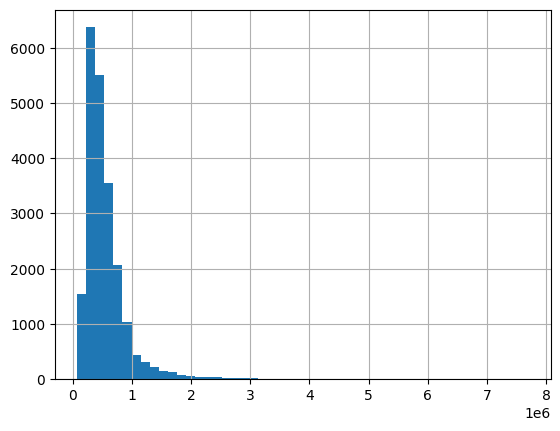

In [6]:
df.price.hist(bins=50)

In [7]:
df.price.skew()

np.float64(4.024069144684712)

In [8]:
df.price.median()

450000.0

## **Завдання 2. Аномалії та преміальний сегмент**

1. Які будинки можна віднести до **преміального сегменту**?
2. Які будинки виглядають **занадто дорогими або занадто дешевими**?
3. Чому такі будинки **не варто використовувати** для оцінки масового ринку?

In [10]:
df['price'].quantile([0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,price
0.05,210000.0
0.25,321950.0
0.50,450000.0
0.75,645000.0
0.95,1156480.0
0.99,1964400.0


<Axes: >

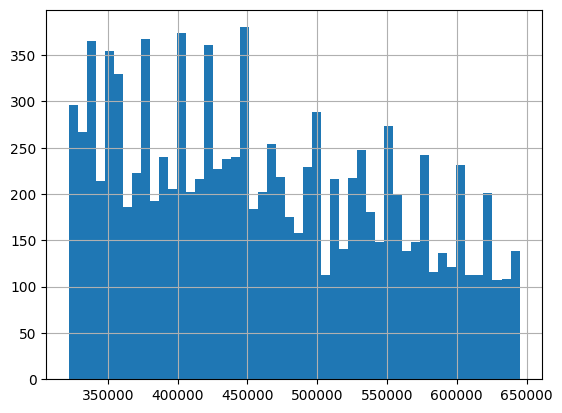

In [14]:
mass_df = df[(df.price.quantile(0.25) <= df.price) & (df.price <= df.price.quantile(0.75))]
mass_df.price.hist(bins=50)

<Axes: >

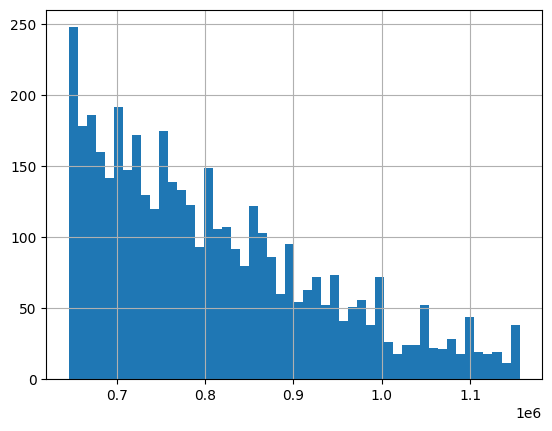

In [15]:
expensive_df = df[(df.price > df.price.quantile(0.75)) & (df.price < df.price.quantile(0.95))]
expensive_df.price.hist(bins=50)

<Axes: >

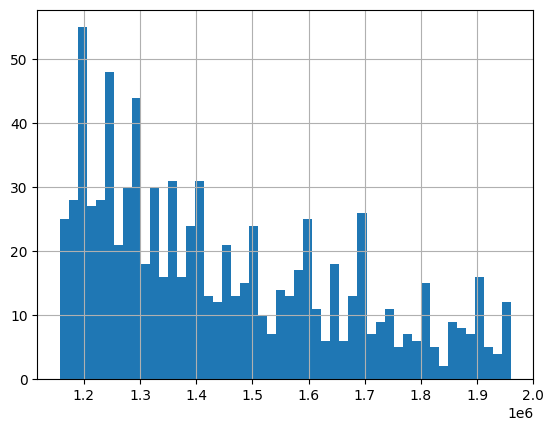

In [16]:
premium_df = df[(df.price > df.price.quantile(0.95)) & (df.price < df.price.quantile(0.99))]
premium_df.price.hist(bins=50)

## **Завдання 3. Порівняння будинків різного розміру**

Як коректно **порівнювати між собою будинки різної площі**, щоб оцінка ціни була справедливою?

(Який показник варто використати замість “просто ціни”?)

In [17]:
df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [18]:
df[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


<Axes: >

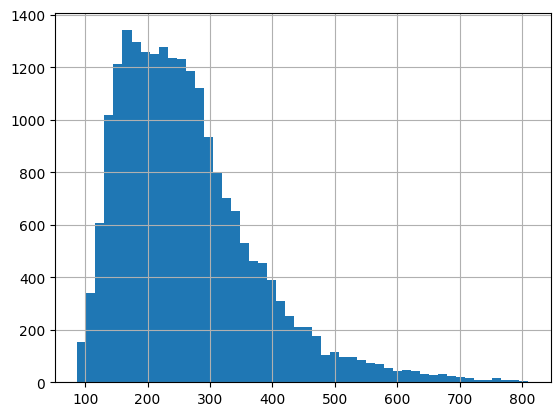

In [20]:
df['price_per_sqft'] = df.price / df.sqft_living
df.price_per_sqft.hist(bins=50)

## **Завдання 4. Сегментація ринку за ціною**

Як можна розділити ринок будинків на **цінові сегменти**?

* Скільки сегментів ви б виділили?
* Чим вони відрізняються між собою за ціною?

In [21]:
df['segment'] = pd.qcut(df.price, q=[0, 0.25, 0.5, 0.75, 1], labels=['low', 'mass', 'high', 'vip'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,segment
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,low
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,high
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,low
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,high
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,mass
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,mass
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,mass
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,mass


<Axes: >

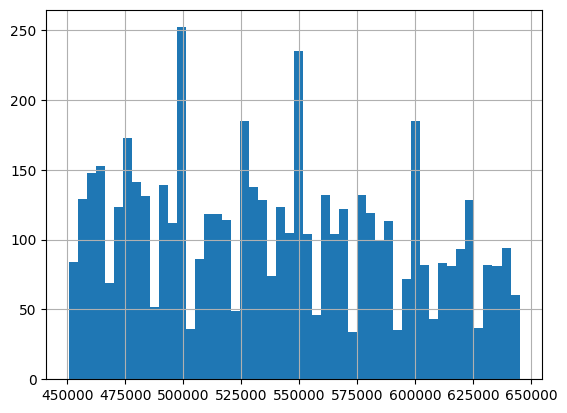

In [25]:
df[df.segment == 'high'].price.hist(bins=50)

In [26]:
!pip install ydata_profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00


In [27]:
from ydata_profiling import ProfileReport

In [28]:
profiler = ProfileReport(df)

In [29]:
profiler.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:00<00:00, 50.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
files.download('report.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>